In [1]:
from karabo.imaging.image import Image


# Render plots inline
%matplotlib inline

The RASCIL data directory is not available - continuing but any simulations will fail


## Read in the image

In [2]:
restored = Image.read_from_file("data/restored.fits")

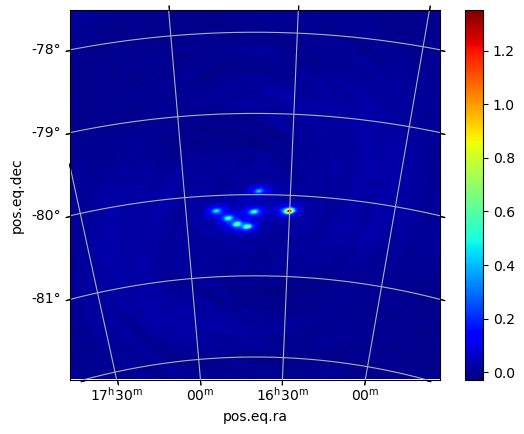

In [3]:
restored.plot()

## Cut the image into pieces

In [4]:
# Cut image into 4, with an overlap of 100 pixels
restored_cuts = restored.split_image(N=2, overlap=100)

In [5]:
len(restored_cuts)

4

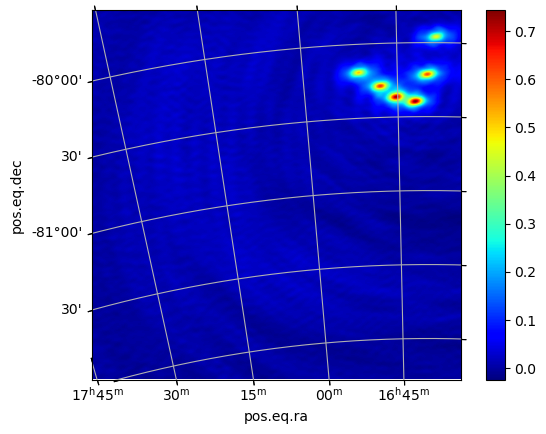

In [6]:
restored_cuts[0].plot()

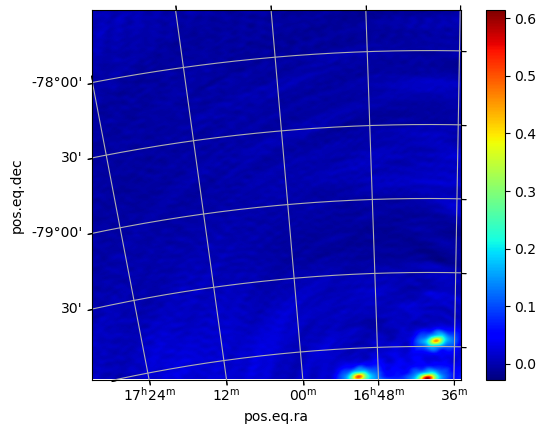

In [7]:
restored_cuts[1].plot()

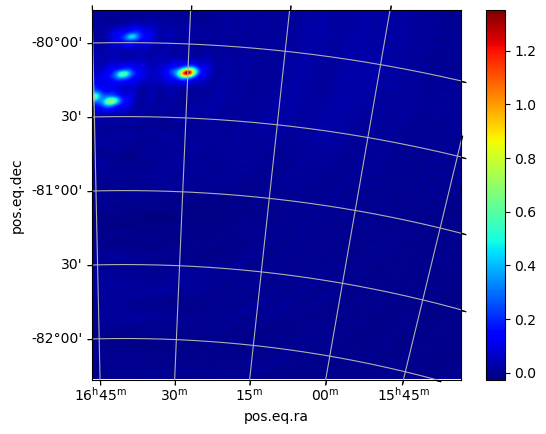

In [8]:
restored_cuts[2].plot()

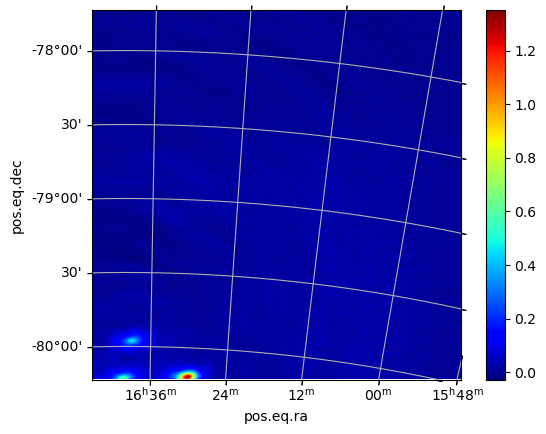

In [9]:
restored_cuts[3].plot()

## Mosaicking
Mosaicking in Karabo works with the astropy reproject: https://reproject.readthedocs.io/en/stable/

In [10]:
from karabo.imaging.image import ImageMosaicker

In [11]:
mi = ImageMosaicker()
restored_mosaicked = mi.process(restored_cuts)

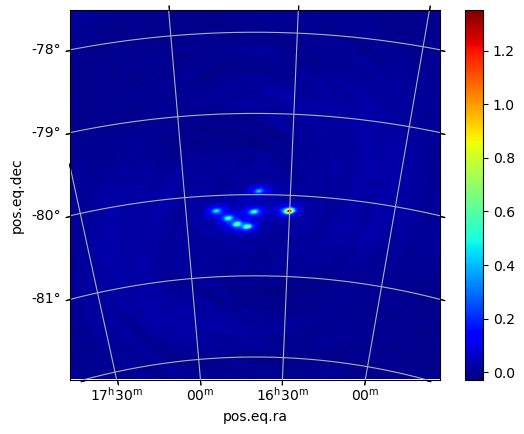

In [12]:
# Show restored image
restored_mosaicked[0].plot()

In [20]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image footprint')

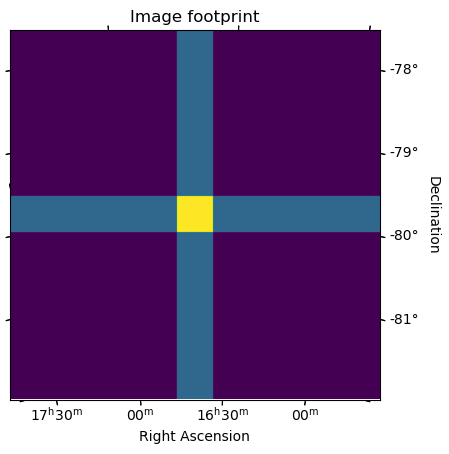

In [31]:
ax2 = plt.subplot(projection=WCS(restored_mosaicked[0].header))
ax2.imshow(restored_mosaicked[1], origin="lower")
ax2.coords["ra"].set_axislabel("Right Ascension")
ax2.coords["dec"].set_axislabel("Declination")
ax2.coords["dec"].set_axislabel_position("r")
ax2.coords["dec"].set_ticklabel_position("r")
ax2.set_title("Image footprint")

### Negative overlap

In [32]:
# Cut image into 4, with an overlap of 100 pixels
restored_cuts = restored.split_image(N=2, overlap=-100)

In [33]:
mi = ImageMosaicker()
restored_mosaicked = mi.process(restored_cuts)

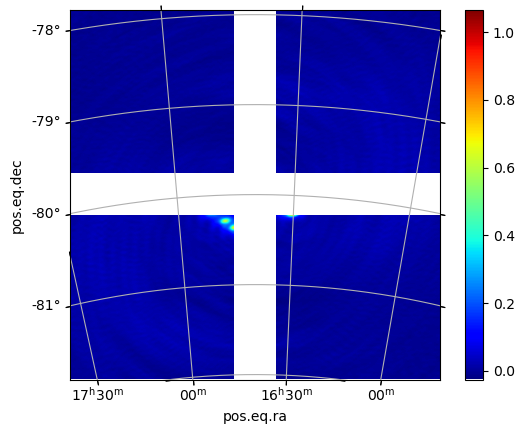

In [34]:
# Show restored image
restored_mosaicked[0].plot()

Text(0.5, 1.0, 'Image footprint')

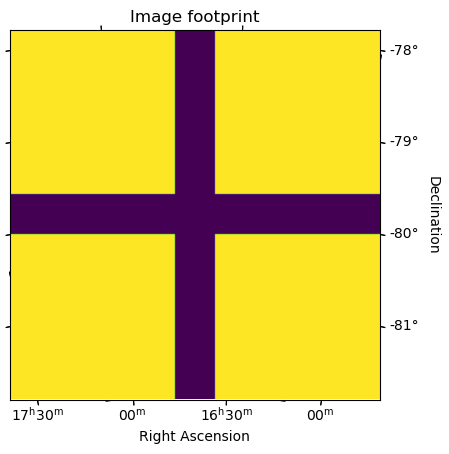

In [35]:
ax2 = plt.subplot(projection=WCS(restored_mosaicked[0].header))
ax2.imshow(restored_mosaicked[1], origin="lower")
ax2.coords["ra"].set_axislabel("Right Ascension")
ax2.coords["dec"].set_axislabel("Declination")
ax2.coords["dec"].set_axislabel_position("r")
ax2.coords["dec"].set_ticklabel_position("r")
ax2.set_title("Image footprint")